# Part I: Data Exploration and Visualization

We will be using the <b>"Epileptic Seizure Recognition Data Set"</b> (2017) from the <it>UC Irvine Machine Learning Repository</it>, available for download here: http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition# <br> 
(For Linux or Mac users, you can open a terminal, copy this link, and use the command: <br>
        wget http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv 
to download the dataset into your working directory) <br>

<b>An aside about the dataset:</b> the data file is in CSV, or comma-separated value, format and contains a numerical representation of EEG data, which is recorded as a time series (the frequencies of brainwaves as they change over time). To analyze this data, it is helpful to "sample" the time series and process it into an easier-to-use format using the Fast Fourier Transform (FFT) algorithm - a super useful and powerful mathematical tool which you don't need to know about to use this data. <br>

The dataset was constructed by measuring brainwave activity from a total of 500 individuals who were each recorded for 23.5 seconds, then the time series were transformed using the FFT such that the 23.5 second measurements sampled into 4097 data points. The 500 patients' 23 second recordings results in 11500 samples in the dataset, each with a total of 179 features + a label indicating epiliptic activity. <br>

That's a whole lot of data! One nice way to think of how to represent this in our program is in a grid-like structure with rows and columns (or a matrix, if you are already familiar), in which each row is a sample corresponding to a patient's brain data and each column representing one feature of the EEG data. Therefore, we should have 11500 rows and 179+1 columns in our grid. <br>

Now, let's load this data into our grid - a multidimensional Numpy array!

In [1]:
# Import some helpful libraries
import numpy as np  # Numpy - we'll use this to store and preprocess the data
import sklearn      # scikit learn - we'll take advantage of data visualization tools as well as an easy to use, off-the-shelf SVM implementation

# The 1st row in the dataset is a header, which we will exclude using the skiprows parameter, 
# as well as the first column, which "names" the specific example based on patient and brainwave sample

extract_cols = range(1, 180) # Keep the brain activity features and corresponding label
seizure_data = np.loadtxt("seizure_data.csv", delimiter=",", skiprows=1, usecols=extract_cols) # Load in the data

Each row in the dataset has a label with values 1-5: a label of '1' indicates epileptic seizure, while labels '2', '3', '4', and '5' represent subjects who did not have a seizure. Most papers which have analyzed this data have used this for binary classification, which is what we'll also do as a slight simplification and for more meaningful results (since we're assuming that you haven't come to this tutorial to learn about neuroscience). <br>

We call this process "binarizing" the dataset in a <b>"one-against-all"</b> manner (either the patient has epileptic seizure or doesn't), so we consider all rows with label '1' to be part of the <b>"positive class"</b>, and all other labels will be '0' and part of the <b>"negative class"</b>. 

In [2]:
print("Before binarizing:", seizure_data[:10, -1])

# Binarize the labels of the all samples/rows in the dataset
for i in range(len(seizure_data)):
    # If the sample doesn't have a positive label, consider it in the negative class
    if seizure_data[i, -1] != 1:
        seizure_data[i, -1] = 0
        
print("After binarizing:", seizure_data[:10, -1])

('Before binarizing:', array([4., 1., 5., 5., 5., 5., 4., 2., 1., 4.]))
('After binarizing:', array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0.]))


Another quick trick that will simplify our lives later on is to separate the class labels from the rest of the features. We'll call the portion with the features the <b>dataset</b> and the corresponding classes the <b>labels</b>. (Often, simply <b>X</b> and <b>y</b> are used to denote the feature data and classes respectively, especially in online literature and Python documentation, so if you come across this, that's what it means).

In [3]:
# Separate the data features from the labels
data = seizure_data[:, :-1]
labels = seizure_data[:, -1]

How that we have our data ready to go, we want to get some sense of "what it looks like". If our data were two dimensional we could simply plot it and see plainly if the two types or classes were mixed or very far apart. To give a silly example, let's say we wanted to classify German shepherds and tabby kittens based on their weight and height. It would be pretty easy to see that plotting the weights along the x-axis, heights along the y-axis, that kittens would be close to the origin while the shepherds would be so much taller and heavier that they would be far away on the other side of the plot. 

Or, for example, if we wanted to classify individual cherries and watermelons based on the color and weight of each, we would have red and small weights corresponding to cherries, and green and big weights corresponding to watermelons, which would be easy to visualize. We'd have a bunch of red dots close to the origin, and a bunch of green dots far away from the origin. <br>



### 

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
dog_img = Image.open("german-shepherd.jpg")
cat_img = Image.open("kitten.jpg")
dog_img.show()
cat_img.show()

Once we begin dealing with data with more than 3 or form dimensions - the dimension of space we live in - it's nearly impossible to have an intuition on how data "looks". So for us, unless we do something special with our data, we won't be able to have a visual sense of the form of our data. Herein, we look at two special algorithms: <b>atPCA</b> (Principal Components Analysis) and <b>t-SNE</b> (t-distributed Stochastic Neighbor Embedding). <br>

## Principal Components Analysis:
If you've had some exposure to Linear Algebra, then you may enjoy this next portion; otherwise, feel free to read about the intuition behind it and skip down to t-SNE (no hard feelings). <> <br>

<b>PCA</b> is a special procedure which takes a set of examples/samples/<it>observations</it> (the rows of our data matrix), and their corresponding features/attributes/<it>variables</it>: in statistical terms, it takes the observations and their possibly correlated, or dependent variables and processes them in a way to return a minimal set of variables which are <b>linearly uncorrelated</b>. This minimal set of uncorrelated variables are where the algorithm gets its name; these are the <b>principal components</b>. In layman terms, PCA takes your data in a high dimension we'll represent with the letter $d$ and aims to transform it into a lower dimension we'll call $b$ (with $b < d$) such that you keep the dimensions which encapsulate the most information about our data. lose the a small but minimal  <br>


### Rescale and standardize the data
Before we apply PCA to reduce the dimensionality of our dataset, it will be helpful to first normalize and scale the features - this is sometimes referred to as Z-scale normalization. What this means is that for each of the 178 features in the dataset, we will find the mean value and shift each value such that it falls within the standard normal Gaussian distribution for that feature. In other words, we want each feature to have a mean value of 0 and standard deviation of 1, or have the value of each feature fall under a curve that looks something like this:

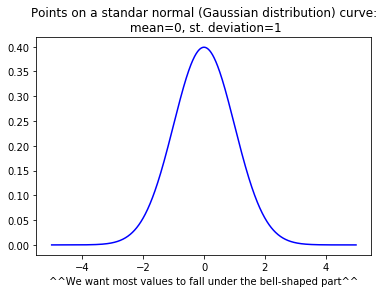

In [5]:
points = np.arange(-5, 5, 0.01)
gaussian = np.exp(-((points)**2)/2) / np.sqrt(2 * np.pi)

plt.plot(points, gaussian, c='b')
plt.xlabel("^^We want most values to fall under the bell-shaped part^^")
plt.title("Points on a standar normal (Gaussian distribution) curve:\n mean=0, st. deviation=1")
plt.show()

In [6]:
def z_score_normalize(data):
    for i in range(data.shape[1]):
        z_score_std_data = (data[:,i] - data[:,i].mean()) / data[:,i].std()
        data[:,i] = z_score_std_data
    return data

def minmax_scaling(data):
    for i in range(data.shape[1]):
        data_minmax = (data[:,i] - data[:,i].min()) / (data[:,i].max() - data[:,i].min())
        data[:,i] = data_minmax
    return data
            
# Normalize and Min-Max scale the data before applying the PCA transformation
z_scored = z_score_normalize(data)
normed_scaled = minmax_scaling(z_scored)

Now that we've z-score normalized the data, we want to apply PCA. To see the effects of the normalization, we'll apply PCA to the normalized data as well as the original dataset as-is.

In [8]:
from sklearn.decomposition import PCA

print("Before PCA, the dataset has:", data.shape[0], "samples and", data.shape[1], "features.")

# Instantiate the object which will transform our dataset down from 178 to to having 2 features
straightPCA = PCA(n_components=2)
normed_scaledPCA = PCA(n_components=2)

# "Fit" the PCA model with the original () and normed/scaled data
pca_data = straightPCA.fit_transform(data[:])
scaled_pca_data = normed_scaledPCA.fit_transform(normed_scaled[:])

# # Add the column of labels to the reduced data matrix
# reduced_as_is = np.hstack((reduced_as_is, seizure_data[:, -1].reshape(-1, 1)))
# reduced_scaled = np.hstack((reduced_scaled, seizure_data[:, -1].reshape(-1, 1)))

print("After PCA, the dataset has:", pca_data.shape[0], "samples and", pca_data.shape[1], "features.")

('Before PCA, the dataset has:', 11500, 'samples and', 178, 'features.')
('After PCA, the dataset has:', 11500, 'samples and', 2, 'features.')


Now that we've done some successful dimensionality reduction, we will plot the data and color the points black if they are negative (no seizure activity) samples and red if they are positive (seizure activity). For this, we'll use the <b>matplotlib</b> library to use the pyplot.scatter function to produce a nice scatterplot.

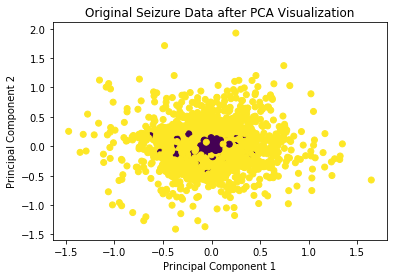

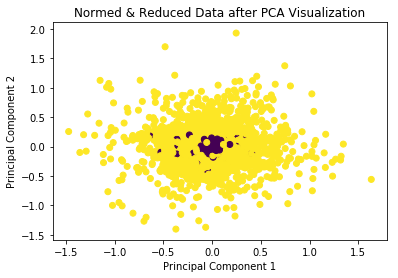

In [12]:
# Create one scatter plot using the two PCs and color code by the class labels
# plt.figure(figsize=(16, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Original Seizure Data after PCA Visualization")
plt.show()

plt.scatter(scaled_pca_data[:, 0], scaled_pca_data[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Normed & Reduced Data after PCA Visualization")
plt.show()

Unfortunately, since many of the data points are overlapping, it's hard to see what's really going on here. We're going to create 3D scatter plots that will better represent the "shape" of the data. 
(Check out the <b>matplotlib</b> documentation for more: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

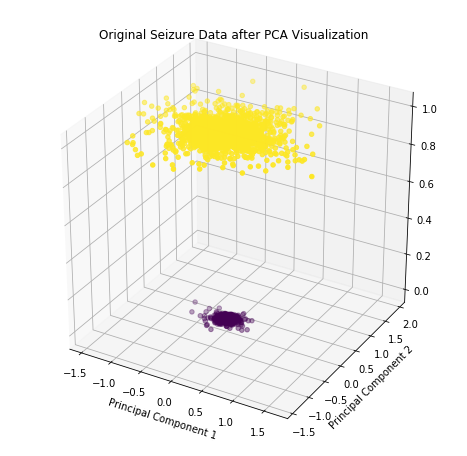

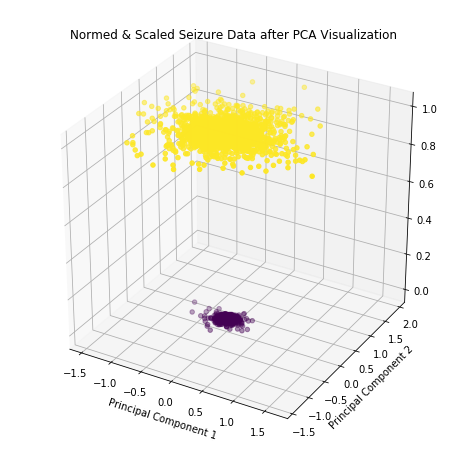

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], labels, c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Original Seizure Data after PCA Visualization")
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_pca_data[:, 0], scaled_pca_data[:, 1], labels, c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Normed & Scaled Seizure Data after PCA Visualization")
plt.show()

Now we can easily see that the yellow dots are all clustered together and completely separated from the purple clusters! In fact, the data are so well separated, that we could think of hanging a sheet between them such that all the yellow (negative) samples are above the sheet and all the purple (positive) samples are below it. This brings us to the beauty and purpose of the SVM algorithm. <br>

# Part II: Support Vector Machine

There are two main types of SVM: that which performs <b>linear</b> classification - known as the Linear SVM model - and that which can efficiently perform <b>non-linear</b> classification using a special function called a <b>kernel</b> (this is sometimes referred to as the "kernel trick"). The kernel is the name for the particular type of function that the SVM tries to <i>learn</i> such that the function is the division or separation of data by class. <br>

Technically, the SVM algorithm can also be used in the context of <i>regression</i> (predicting real values from data; a classic example is given aspects about houses, predict how much a house you're interested in costs), as well as <i>multiclass classification</i> (3 or more classes) - but we'll focus on binary classification. <br> 

### Decision boundary
In our 3D plot of the data after applying PCA, we noticed that there is a very clear separation of the data, where if we could suspend a sheet between the data or draw a 3D line between the two clusters, we would know if a point would be in the positive or negative class depending on what side of the sheet it was on. That sheet, line, or separation is known as the <b>decision boundary</b> in Machine Learning, and depending on the dimensionality of your data. In math and ML, we call this "sheet" (like a flat surface with no thickness) a <i>plane</i> in the 2D case and a <i>hyperplane</i> in 3 or more dimensions - in general, we'll refer to it as a hyperplane.  <br>

The decision boundary can be computed with the help of the kernel function, which can be as simple or as complicated as:

- linear function (a straight line): $\phi(x) = w \cdot x + b$, where $w$ is a vector of parameters which give the slope of the hyperplane and $b$ an additional parameter for the biase 
    - this is nearly the same as equation of a line you probably saw growing up, $y = mx + b$ where $w \longleftrightarrow m$ and the $b's$ serve the same purpose - we don't use this form because it would get confusing with how we refer to datasets with $X$ and $y$ and restricts us to the two dimensional case

- radial basis function: 
    - Gaussian: $\phi(x_i, x_j) = e^{-(||x_i - x_j||)^{2}/w}$ where $w$ is a free parameter (for the model to learn) and $x_i, x_j$ are features of the dataset

- polynomial function: $\phi(x_i, x_j) = (x_i \cdot x_j + b)^n$, where $x_i, x_j$ are features, $b$ is a free parameter, and $n$ is the degree of the polynomial


Since our data are so well separated after applying PCA, it seems like we should get good results by using the simplest choice, the linear kernel. <br>

The beauty of the SVM model is that it not only learns a decision boundary to separate the data classes, but additionally increases the <b>margin</b> which separates the two. The margin is a special product of the parameters it learns: <br>
$$Margin ~=~ \frac{2}{\sqrt{(w \cdot w)}} $$

The larger the margin, the more separation there is between the two classes, and the more likely the model will correctly predict labels of unseen data. This margin is the distance from the closest point of class A

### C: the SVM regularization parameter
When we "train" an ML model, what we really mean is that - in most cases - we are progressively trying to find a parameter or combination of parameters which "fit" the data. From a statistical viewpoint, we're trying to learn the parameters of the underlying distribution of the data, so that given a new datapoint, we can predict which class it will belong to. In order to learn and evaluate our model, we should have samples dedicated to each training and testing the model. This, in it's simplest sense, is known as <b>cross validation</b>.  <br>

As good practice, we'll shuffle the dataset and labels together to help ensure that samples of each class and evenly mixed. Then, we'll take the first ~70% of samples as the training set, ~10% as validation, and and the remainder as the test set. <br> 
The reason for doing cross validation is to prevent the model from learning the training data <i>too well</i>. This phenomenon is called <b>over-fitting</b> and though it may sound counter-intuitive at first, when this happens it means that the model is more likely to poorly <b>generalize</b> to classifying the unseen data in the test set - or predict the labels of the test set less well. Our goal is to train a model which is well-balanced: it learns the training data, thereby reducing training error (1 - accuracy of predicting training data) and is useful and able to predict the classes of the test set well, thus improving test accuracy (% correctly predicted / total attempts). <br>

One technique that is used, particularly with SVM algorithm, is the <b>regularization parameter</b> $C$. This additional value helps by penalizing the error which is incurred when the model incorrectly predicts the class labels of samples during training. For know, we will set this value to $1.0$, so we don't need to specify it in the SVC constructor below.

In [38]:
# First, shuffle the dataset
shuffle_data = np.hstack((pca_data, labels.reshape(-1, 1)))

# Define the splits for the train, validation sets
train_size = int(len(pca_data) * 0.75)
validation_size = int(len(pca_data) * 0.85)

train_data = shuffle_data[: train_size, :-2]
train_labels = shuffle_data[: train_size, -1]
valid_data = shuffle_data[train_size : validation_size, :-2]
valid_labels = shuffle_data[train_size : validation_size, -1]
test_data = shuffle_data[validation_size :, :-2]
test_labels = shuffle_data[validation_size :, -1]

In [44]:
# Initialize the Support Vector Classifier with the linear kernel and regularizer C=1.0
svm = sklearn.svm.SVC(C=2, kernel="linear")

# Fit the SVC model
svm.fit(train_data, train_labels)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Test accuracy:
We compute the test accuracy as follows: <br>

1) Compute the error: $\frac{1}{n}(\sum_{i=0}^n |y_{pred} - y_{true}|)$ where $y_{pred}$ is the predicted label, $y_{true}$ the actual class label, and $n$ the number of samples <br>
2) Subtract this from 1 and multiple by 100 to get a percent: $(1 - error) * 100 = \%$ correctly classified <br>

Taking the absolute value in step 1) and summing over all samples and scaling by the nummber of samples is called the <b>Sum Absolute Error</b>. It is possible to square the error, which would transform this into the <b>Mean Squared Error</b> (sometimes called sum squared error when it is not scaled by the number of samples). 

In [47]:
# Test the model's predictive abilities
predictions = svm.predict(test_data)
test_accuracy = 1 - (np.sum(np.abs(predictions - test_labels)) / len(predictions))
print("Our model predicted", test_accuracy*100, "% of test samples correctly!")

('Our model predicted', 79.18840579710145, '% of test samples correctly!')


That's really not too bad! 